# Python and Data Imports

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [197]:
df = pd.read_parquet('../data/cleaned/sp500.parquet')
df

,Date,Close,High,Low,Open,Volume,LogRet
0,2005-09-20,1221.339966,-0.001148,-0.006194,-0.005581,0.110541,-0.007895
1,2005-09-21,1210.199951,-0.012181,-0.008379,-0.007895,0.094124,-0.009163
2,2005-09-22,1214.619995,-0.004003,-0.003759,-0.009163,-0.049652,0.003646
3,2005-09-23,1215.290039,0.001798,0.003685,0.003646,-0.206151,0.000551
4,2005-09-26,1215.630005,0.003056,0.001685,0.000551,0.024631,0.000280
...,...,...,...,...,...,...,...
5025,2025-09-11,6587.470215,0.005616,0.004511,0.000629,0.032486,0.008450
5026,2025-09-12,6584.290039,0.001110,0.005134,0.005515,-0.156219,-0.000483
5027,2025-09-15,6615.279785,0.002937,0.003426,0.001945,0.083334,0.004696
5028,2025-09-16,6606.759766,0.001113,-0.000297,0.003121,0.060471,-0.001289


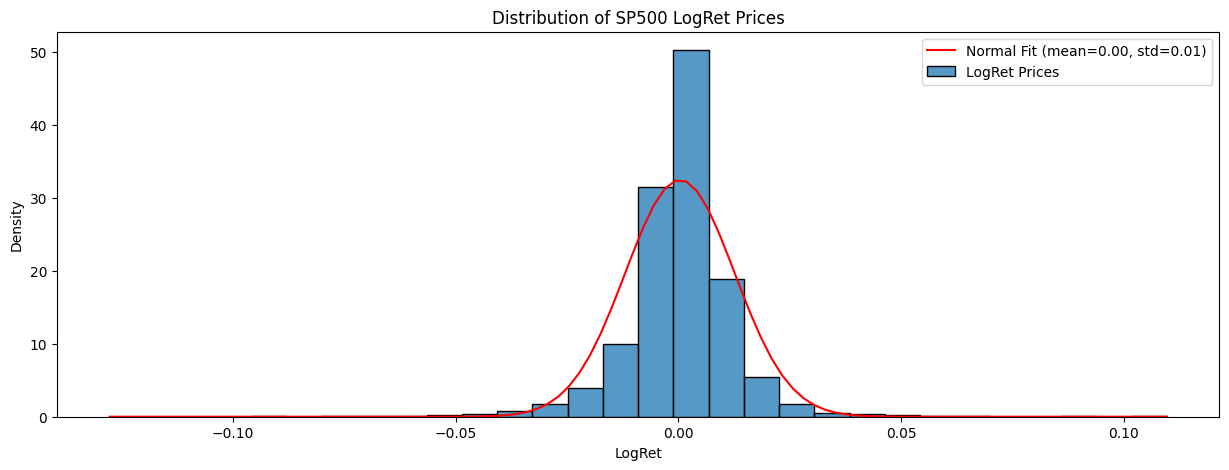

In [198]:
from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt
df.dropna(inplace=True)
# Plot histogram of Close prices
plt.figure(figsize=(15, 5))
sns.histplot(df['LogRet'], kde=False, stat="density", bins=30, label='LogRet Prices')

# Fit a normal distribution to the data
mean, std = norm.fit(df['LogRet'])
x = np.linspace(df['LogRet'].min(), df['LogRet'].max(), 100)
pdf = norm.pdf(x, mean, std)

# Plot the normal distribution curve
plt.plot(x, pdf, 'r-', label=f'Normal Fit (mean={mean:.2f}, std={std:.2f})')
plt.title('Distribution of SP500 LogRet Prices')
plt.legend()
plt.show()

## Stationarity analysis

In [199]:

from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

def stationarity_analysis(df, dataset_name, column_name = None):
    """
    column_name: specify the column to analyze, default is 'Close'
    Perform ADF and KPSS tests for stationarity analysis
    """
    data = df['Close'] if column_name is None else df[column_name]
    
    data.dropna(inplace=True)  # Drop NaN values for accurate testing
    
    print(f"\n{'='*50}")
    print(f"STATIONARITY ANALYSIS: {dataset_name.upper()}")
    print(f"{'='*50}")
    
    # ADF Test
    print("\n--- AUGMENTED DICKEY-FULLER TEST ---")
    adf_result = adfuller(data, autolag='AIC')
    print(f"ADF Statistic: {adf_result[0]:.6f}")
    print(f"p-value: {adf_result[1]:.6f}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"\t{key}: {value:.6f}")
    
    if adf_result[1] <= 0.05:
        print("ADF Result: STATIONARY (Reject null hypothesis)")
    else:
        print("ADF Result: NON-STATIONARY (Fail to reject null hypothesis)")
    
    # KPSS Test
    print("\n--- KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN TEST ---")
    kpss_result = kpss(data, regression='c', nlags='auto')
    print(f"KPSS Statistic: {kpss_result[0]:.6f}")
    print(f"p-value: {kpss_result[1]:.6f}")
    print("Critical Values:")
    for key, value in kpss_result[3].items():
        print(f"\t{key}: {value:.6f}")
    
    if kpss_result[1] <= 0.05:
        print("KPSS Result: NON-STATIONARY (Reject null hypothesis)")
    else:
        print("KPSS Result: STATIONARY (Fail to reject null hypothesis)")
    
    # Combined interpretation
    print("\n--- COMBINED INTERPRETATION ---")
    adf_stationary = adf_result[1] <= 0.05
    kpss_stationary = kpss_result[1] > 0.05
    
    if adf_stationary and kpss_stationary:
        print("CONCLUSION: Series is STATIONARY")
    elif not adf_stationary and not kpss_stationary:
        print("CONCLUSION: Series is NON-STATIONARY")
    else:
        print("CONCLUSION: Results are INCONCLUSIVE - further investigation needed")

stationarity_analysis(df=df, dataset_name="S&P500_raw")
stationarity_analysis(df=df, dataset_name="S&P500_log_returns", column_name='LogRet')


STATIONARITY ANALYSIS: S&P500_RAW

--- AUGMENTED DICKEY-FULLER TEST ---
ADF Statistic: 2.214788
p-value: 0.998894
Critical Values:
	1%: -3.431658
	5%: -2.862118
	10%: -2.567078
ADF Result: NON-STATIONARY (Fail to reject null hypothesis)

--- KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN TEST ---
KPSS Statistic: 10.284780
p-value: 0.010000
Critical Values:
	10%: 0.347000
	5%: 0.463000
	2.5%: 0.574000
	1%: 0.739000
KPSS Result: NON-STATIONARY (Reject null hypothesis)

--- COMBINED INTERPRETATION ---
CONCLUSION: Series is NON-STATIONARY

STATIONARITY ANALYSIS: S&P500_LOG_RETURNS

--- AUGMENTED DICKEY-FULLER TEST ---
ADF Statistic: -17.945452
p-value: 0.000000
Critical Values:
	1%: -3.431655
	5%: -2.862117
	10%: -2.567077
ADF Result: STATIONARY (Reject null hypothesis)

--- KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN TEST ---
KPSS Statistic: 0.189312
p-value: 0.100000
Critical Values:
	10%: 0.347000
	5%: 0.463000
	2.5%: 0.574000
	1%: 0.739000
KPSS Result: STATIONARY (Fail to reject null hypothesis)

--- COMBIN

In [200]:
mean_lr = df['LogRet'].mean()
std_lr = df['LogRet'].std()
CLAMP_STD = 3

upper = mean_lr + CLAMP_STD * std_lr
lower = mean_lr - CLAMP_STD * std_lr

df['LogRet'] = np.where(df['LogRet'] > upper, upper,
                        np.where(df['LogRet'] < lower, lower, df['LogRet']))


In [201]:
# df.plot(x= 'Date', y='LogRet', title='SP500 Log Returns Over Time', figsize=(15,5))

# # Plot histogram of Close prices
# plt.figure(figsize=(15, 5))
# sns.histplot(df['LogRet'], kde=False, stat="density", bins=30, label='LogRet Prices')

# # Fit a normal distribution to the data
# mean, std = norm.fit(df['LogRet'])
# x = np.linspace(df['LogRet'].min(), df['LogRet'].max(), 100)
# pdf = norm.pdf(x, mean, std)

# # Plot the normal distribution curve
# plt.plot(x, pdf, 'r-', label=f'Normal Fit (mean={mean:.2f}, std={std:.2f})')
# plt.title('Distribution of SP500 LogRet Prices')
# plt.legend()
# plt.show()

In [202]:
# create a collumn calles highlow_range which is the difference between the high and low prices
df['highlow_range'] = df['High'] - df['Low']


In [203]:
# cordf = df.drop(columns=['Date']).corr()
# # cordf = df.drop(columns=['Date']).corr()
# cordf

In [204]:
# # correlation plot of all the features in the dataframe
# plt.figure(figsize=(10, 8))
# sns.heatmap(cordf, annot=True, fmt=".4f", cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
# plt.title('Correlation Matrix of SP500 Features')
# plt.show()

# Building the PyTorch sRNN Models

In [205]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit  # For guidance, but implementing custom rolling for financial data

# Step 1: Define Elman RNN Model
class ElmanRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(ElmanRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh')
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Step 2: Custom Dataset for Sequences
class TimeSeriesDataset(Dataset):
    def __init__(self, data, targets, seq_len=10):
        self.data = data
        self.targets = targets
        self.seq_len = seq_len
    
    def __len__(self):
        return len(self.data) - self.seq_len
    
    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_len]
        y = self.targets[idx + self.seq_len]
        return torch.FloatTensor(x), torch.FloatTensor([y])

# Step 3: Data Preparation (No global scaling; features exclude Date and LogRet)
features = ['LogRet', 'Volume', 'highlow_range']
X = df[features].values
y = df['LogRet'].shift(-1).dropna().values  # Next LogRet; len N-1
X = X[:-1]  # Align; assume df sorted by Date


In [206]:

class JordanRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        """
        Jordan RNN Model. The num_layers parameter is kept for API consistency
        but this implementation uses a single hidden layer.
        """
        super(JordanRNN, self).__init__()
        self.hidden_size = hidden_size
        
        # The RNN cell takes the input and the combined hidden+previous_output state
        self.rnn_cell = nn.RNNCell(input_size + output_size, hidden_size)
        
        # Fully connected layer to produce the output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Get batch size and sequence length
        batch_size = x.size(0)
        seq_len = x.size(1)
        
        # Initialize hidden state and output for the first time step
        hidden = torch.zeros(batch_size, self.hidden_size).to(x.device)
        prev_output = torch.zeros(batch_size, self.fc.out_features).to(x.device)

        # Manually loop through each time step in the sequence
        for t in range(seq_len):
            # Concatenate current input with the previous time step's output
            combined_input = torch.cat((x[:, t, :], prev_output), dim=1)
            
            # Update the hidden state
            hidden = self.rnn_cell(combined_input, hidden)
            
            # The output for this step is based on the new hidden state
            prev_output = self.fc(hidden)
            
        # The final output is the output from the last time step
        return prev_output

## Model parameters and train validation test splitting

In [207]:

# Parameters
seq_len = 10
batch_size = 32
hidden_size = 100 #Hyperparameter to tune
num_layers = 1
learning_rate = 0.01 #Hyperparameter to tune
epochs = 500
n_folds = 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = len(features)
output_size = 1

model_to_use = 'Jordan'  # or Elman

# --- New: one overarching train/holdout split at the beginning (holdout is the last chunk of the series)
holdout_ratio = 0.3  # fraction kept for final test at the end
n_total = len(X)
holdout_size = int(holdout_ratio * n_total)
if holdout_size < seq_len + 1:
    raise ValueError("Holdout set too small for the chosen seq_len; reduce holdout_ratio or seq_len.")

# Training and validation portion
X_trainval = X[:-holdout_size]
y_trainval = y[:-holdout_size]

# Held out portion
X_holdout = X[-holdout_size:]
y_holdout = y[-holdout_size:]

# --- Growing-window CV on the training+validation portion
results = {'fold': [], 'rmse': [], 'mae': []}

n_trainval = len(X_trainval)
# initial training window inside trainval (choose a sensible starting window)
initial_train_ratio = 0.5
initial_train_window = max(int(initial_train_ratio * n_trainval), seq_len + 1)
remaining = n_trainval - initial_train_window
if remaining < n_folds:  # ensure at least one sample per test fold
    raise ValueError("Not enough data in training portion to create the requested number of folds. Reduce n_folds or holdout_ratio.")

fold_test_size = max(1, remaining // n_folds)



### Handle data issues from the train/test splitting

In [208]:
from sklearn.impute import SimpleImputer

Xh = X_holdout  # numpy array from your code
print("shape:", Xh.shape)
print("any inf:", np.isinf(Xh).any())
print("any nan:", np.isnan(Xh).any())
finite_mask = np.isfinite(Xh)
print("finite all?:", finite_mask.all())
# extremes
finite_vals = Xh[finite_mask]
print("max abs finite value:", np.nan if finite_vals.size==0 else np.max(np.abs(finite_vals)))
# if you still use df/feature names:
Xh_df = pd.DataFrame(Xh, columns=features)
print(Xh_df.replace([np.inf, -np.inf], np.nan).isna().sum())

# convert inf -> nan
X_trainval = np.where(np.isfinite(X_trainval), X_trainval, np.nan)
X_holdout  = np.where(np.isfinite(X_holdout),  X_holdout,  np.nan)

# impute (median is robust)
imp = SimpleImputer(strategy="median")
X_trainval = imp.fit_transform(X_trainval)
X_holdout  = imp.transform(X_holdout)

shape: (1508, 3)
any inf: True
any nan: False
finite all?: False
max abs finite value: 0.8602027484710865
LogRet           0
Volume           2
highlow_range    0
dtype: int64


### Normal CV

In [209]:

# for fold in range(n_folds):
#     train_start = 0
#     train_end = initial_train_window + fold * fold_test_size  # growing window
#     test_start = train_end
#     test_end = min(test_start + fold_test_size, n_trainval)

#     if train_end - train_start < seq_len + 1 or test_end - test_start < seq_len + 1:
#         print(f"Skipping fold {fold}: Insufficient data (train {train_start}-{train_end}, test {test_start}-{test_end})")
#         continue

#     # Extract fold data (relative to trainval)
#     X_tr = X_trainval[train_start:train_end]
#     y_tr = y_trainval[train_start:train_end]
#     X_te = X_trainval[test_start:test_end]
#     y_te = y_trainval[test_start:test_end]

#     # Scale PER FOLD (fit on train only to avoid leakage)
#     scaler_X = StandardScaler().fit(X_tr)
#     X_tr_scaled = scaler_X.transform(X_tr)
#     X_te_scaled = scaler_X.transform(X_te)

#     scaler_y = StandardScaler().fit(y_tr.reshape(-1, 1))
#     y_tr_scaled = scaler_y.transform(y_tr.reshape(-1, 1)).flatten()
#     y_te_scaled = scaler_y.transform(y_te.reshape(-1, 1)).flatten()

#     # Create datasets/loaders
#     train_dataset = TimeSeriesDataset(X_tr_scaled, y_tr_scaled, seq_len)
#     test_dataset = TimeSeriesDataset(X_te_scaled, y_te_scaled, seq_len)
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     # Model, loss, optimizer (fresh model per fold)
#     model = ElmanRNN(input_size, hidden_size, output_size, num_layers).to(device)
#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     # Training
#     model.train()
#     for epoch in range(epochs):
#         for batch_x, batch_y in train_loader:
#             batch_x, batch_y = batch_x.to(device), batch_y.to(device)
#             optimizer.zero_grad()
#             outputs = model(batch_x)
#             loss = criterion(outputs.squeeze(), batch_y)
#             loss.backward()
#             optimizer.step()

#     # Evaluation on this fold's test block
#     model.eval()
#     predictions = []
#     with torch.no_grad():
#         for batch_x, _ in test_loader:
#             batch_x = batch_x.to(device)
#             outputs = model(batch_x)
#             predictions.extend(outputs.squeeze().cpu().numpy())

#     predictions = np.array(predictions)
#     true_y = y_te_scaled[seq_len:]  # align with sequence outputs
#     predictions = predictions[:len(true_y)]

#     rmse = np.sqrt(mean_squared_error(true_y, predictions))
#     mae = mean_absolute_error(true_y, predictions)

#     results['fold'].append(fold)
#     results['rmse'].append(rmse)
#     results['mae'].append(mae)

#     print(f"Fold {fold}: RMSE = {rmse:.4f}, MAE = {mae:.4f} (Train: {train_start}-{train_end}, Test: {test_start}-{test_end})")

# # Summarize CV results
# results_df = pd.DataFrame(results)
# print("\nGrowing-window CV Summary (on train+val):")
# print(results_df)
# if not results_df.empty:
#     print(f"Mean RMSE: {results_df['rmse'].mean():.4f} (+/- {results_df['rmse'].std() * 2:.4f})")
#     print(f"Mean MAE: {results_df['mae'].mean():.4f} (+/- {results_df['mae'].std() * 2:.4f})")



### Gridsearch CV

In [210]:
import itertools
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Define the grid of hyperparameters to search over
# Keep this small initially, as grid search is computationally expensive!
param_grid = {
    # 'hidden_size': range(50, 200, 40),
    'hidden_size': [50, 100, 150],  # Use a list of integers instead of range
    # 'hidden_size': [50],  # Use a list of integers instead of range
    # 'learning_rate': [0.01, 0.001],
    'learning_rate': [0.001, 0.01, 0.015],  # Use a list of floats instead of range
    # 'learning_rate': [0.015],  # Use a list of floats instead of range
    # 'seq_len': range(15, 31, 5),
    'seq_len': [10, 20],
    # 'seq_len': [20],
}

# --- Parameters for Early Stopping ---
epochs = 500  # Max number of epochs
patience = 25 # How many epochs to wait for improvement before stopping

# --- Store results for each parameter combination ---
grid_search_results = []
keys, values = zip(*param_grid.items())

# Step 2: Outer loop for Grid Search
for v in itertools.product(*values):
    params = dict(zip(keys, v))
    
    # Unpack current hyperparameters
    hidden_size = params['hidden_size']
    learning_rate = params['learning_rate']
    seq_len = params['seq_len']
    # You can unpack others like batch_size here if you add them to the grid
    
    print(f"\n{'='*60}")
    print(f"TESTING HYPERPARAMETERS: {params}")
    print(f"{'='*60}")
    
    # Store results for the folds of this specific parameter set
    current_param_fold_results = {'rmse': [], 'mae': []}

    # Step 3: Inner loop for Growing-Window Cross-Validation (your original code)
    for fold in range(n_folds):
        train_start = 0
        train_end = initial_train_window + fold * fold_test_size
        test_start = train_end
        test_end = min(test_start + fold_test_size, n_trainval)

        # Ensure there's enough data for at least one sequence
        if train_end - train_start < seq_len + 1 or test_end - test_start < seq_len + 1:
            print(f"Skipping fold {fold}: Insufficient data for seq_len={seq_len}")
            continue

        # Extract fold data
        X_tr, y_tr = X_trainval[train_start:train_end], y_trainval[train_start:train_end]
        X_te, y_te = X_trainval[test_start:test_end], y_trainval[test_start:test_end]

        # Scale PER FOLD
        scaler_X = StandardScaler().fit(X_tr)
        X_tr_scaled = scaler_X.transform(X_tr)
        X_te_scaled = scaler_X.transform(X_te)
        scaler_y = StandardScaler().fit(y_tr.reshape(-1, 1))
        y_tr_scaled = scaler_y.transform(y_tr.reshape(-1, 1)).flatten()
        y_te_scaled = scaler_y.transform(y_te.reshape(-1, 1)).flatten()

        # Create datasets & loaders with the current seq_len
        train_dataset = TimeSeriesDataset(X_tr_scaled, y_tr_scaled, seq_len)
        # The test_dataset is now our validation set for early stopping
        val_dataset = TimeSeriesDataset(X_te_scaled, y_te_scaled, seq_len) 
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model with current hyperparameters
        if model_to_use == 'Jordan':
            model = JordanRNN(input_size, hidden_size, output_size, num_layers).to(device)
        elif model_to_use == 'Elman':
            model = ElmanRNN(input_size, hidden_size, output_size, num_layers).to(device)
        elif model_to_use == 'Multi':
            print("Multi-RNN not implemented yet.")
            raise ValueError("Invalid model_to_use specified.")
        else:
            raise ValueError("Invalid model_to_use specified.")
        
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # --- Training with Early Stopping ---
        best_val_loss = float('inf')
        patience_counter = 0
        
        for epoch in range(epochs):
            model.train()
            for batch_x, batch_y in train_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                optimizer.zero_grad()
                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)
                loss.backward()
                optimizer.step()

            # Validation phase for early stopping
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for batch_x, batch_y in val_loader:
                    batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                    outputs = model(batch_x)
                    val_loss += criterion(outputs.squeeze(), batch_y).item()
            
            val_loss /= len(val_loader)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # Optional: save the best model state
                torch.save(model.state_dict(), 'best_model_fold.pth')
            else:
                patience_counter += 1
            
            if patience_counter >= patience:
                print(f"Fold {fold}: Early stopping at epoch {epoch+1}")
                break
        
        # Load the best model for evaluation
        model.load_state_dict(torch.load('best_model_fold.pth'))

        # Evaluation on this fold's test block
        model.eval()
        predictions = []
        with torch.no_grad():
            for batch_x, _ in val_loader: # Use the same validation loader
                batch_x = batch_x.to(device)
                outputs = model(batch_x)
                predictions.extend(outputs.squeeze().cpu().numpy())

        predictions = np.array(predictions)
        true_y = y_te_scaled[seq_len:]
        predictions = predictions[:len(true_y)]

        rmse = np.sqrt(mean_squared_error(true_y, predictions))
        mae = mean_absolute_error(true_y, predictions)

        current_param_fold_results['rmse'].append(rmse)
        current_param_fold_results['mae'].append(mae)

    # After all folds for the current param set are done, calculate the average score
    if current_param_fold_results['rmse']: # Check if any folds ran
        mean_rmse = np.mean(current_param_fold_results['rmse'])
        mean_mae = np.mean(current_param_fold_results['mae'])
        
        print(f"\n--- Avg CV Score for {params}: RMSE = {mean_rmse:.4f}, MAE = {mean_mae:.4f} ---")
        
        grid_search_results.append({
            'params': params,
            'mean_rmse': mean_rmse,
            'mean_mae': mean_mae
        })

# Step 4: Find and print the best hyperparameter combination
if grid_search_results:
    best_params_result = min(grid_search_results, key=lambda x: x['mean_rmse'])
    print(f"\n{'='*60}")
    print("GRID SEARCH COMPLETE")
    print(f"Best Hyperparameters found: {best_params_result['params']}")
    print(f"Best Mean CV RMSE: {best_params_result['mean_rmse']:.4f}")
    print(f"{'='*60}")
else:
    print("\nGrid search did not complete. Check data size and parameters.")


TESTING HYPERPARAMETERS: {'hidden_size': 50, 'learning_rate': 0.001, 'seq_len': 10}
Fold 0: Early stopping at epoch 61
Fold 1: Early stopping at epoch 63

--- Avg CV Score for {'hidden_size': 50, 'learning_rate': 0.001, 'seq_len': 10}: RMSE = 0.6803, MAE = 0.4779 ---

TESTING HYPERPARAMETERS: {'hidden_size': 50, 'learning_rate': 0.001, 'seq_len': 20}
Fold 0: Early stopping at epoch 56
Fold 1: Early stopping at epoch 53

--- Avg CV Score for {'hidden_size': 50, 'learning_rate': 0.001, 'seq_len': 20}: RMSE = 0.6805, MAE = 0.4781 ---

TESTING HYPERPARAMETERS: {'hidden_size': 50, 'learning_rate': 0.01, 'seq_len': 10}
Fold 0: Early stopping at epoch 68
Fold 1: Early stopping at epoch 54

--- Avg CV Score for {'hidden_size': 50, 'learning_rate': 0.01, 'seq_len': 10}: RMSE = 0.6783, MAE = 0.4764 ---

TESTING HYPERPARAMETERS: {'hidden_size': 50, 'learning_rate': 0.01, 'seq_len': 20}
Fold 0: Early stopping at epoch 56
Fold 1: Early stopping at epoch 52

--- Avg CV Score for {'hidden_size': 50,

In [211]:
best_params_result = min(grid_search_results, key=lambda x: x['mean_rmse'])
best_params_result['params']['learning_rate']

0.01

# Final Testing

### Training model with best parameters and testing 

In [212]:


# Final: retrain on entire trainval and evaluate once on the held-out end-of-series test set
# Fit scalers on whole trainval
scaler_X_full = StandardScaler().fit(X_trainval)
X_trainval_scaled = scaler_X_full.transform(X_trainval)
X_holdout_scaled = scaler_X_full.transform(X_holdout)

scaler_y_full = StandardScaler().fit(y_trainval.reshape(-1, 1))
y_trainval_scaled = scaler_y_full.transform(y_trainval.reshape(-1, 1)).flatten()
y_holdout_scaled = scaler_y_full.transform(y_holdout.reshape(-1, 1)).flatten()

train_dataset_full = TimeSeriesDataset(X_trainval_scaled, y_trainval_scaled,  seq_len=best_params_result['params']['seq_len'])
holdout_dataset = TimeSeriesDataset(X_holdout_scaled, y_holdout_scaled,  seq_len=best_params_result['params']['seq_len'])
train_loader_full = DataLoader(train_dataset_full, batch_size=batch_size, shuffle=False)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

# Train final model on entire trainval
final_model = ElmanRNN(input_size, best_params_result['params']['hidden_size'], output_size, num_layers).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params_result['params']['learning_rate'])


In [213]:

final_model.train()

for epoch in range(epochs):
    for batch_x, batch_y in train_loader_full:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = final_model(batch_x)
        loss = criterion(outputs.squeeze(), batch_y)
        loss.backward()
        optimizer.step()

# Evaluate on holdout
final_model.eval()
predictions = []
with torch.no_grad():
    for batch_x, _ in holdout_loader:
        batch_x = batch_x.to(device)
        outputs = final_model(batch_x)
        predictions.extend(outputs.squeeze().cpu().numpy())

predictions = np.array(predictions)
true_y = y_holdout_scaled[seq_len:]
predictions = predictions[:len(true_y)]

rmse_holdout = np.sqrt(mean_squared_error(true_y, predictions))
mae_holdout = mean_absolute_error(true_y, predictions)

print(f"\nFinal Holdout Test (on last {holdout_size} samples): RMSE = {rmse_holdout:.4f}, MAE = {mae_holdout:.4f}")

# Optional: inverse-transform to original y scale for more interpretable metrics
y_pred_inv = scaler_y_full.inverse_transform(predictions.reshape(-1, 1)).flatten()
y_true_inv = scaler_y_full.inverse_transform(true_y.reshape(-1, 1)).flatten()
rmse_holdout_orig = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
mae_holdout_orig = mean_absolute_error(y_true_inv, y_pred_inv)
print(f"Final Holdout Test (original y scale): RMSE = {rmse_holdout_orig:.6f}, MAE = {mae_holdout_orig:.6f}")



Final Holdout Test (on last 1508 samples): RMSE = 1.0602, MAE = 0.7635
Final Holdout Test (original y scale): RMSE = 0.011256, MAE = 0.008105
